<a href="https://colab.research.google.com/github/anubhavgupta1/Dive-Into-Deep-Learning/blob/main/Deep%20Convolutional%20Neural%20Networks/Concise%20Batch%20Norm%20LeNet/mxnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Concise Batch Norm LeNet

In [ ]:
!pip install d2l==0.16.1
!pip install -U mxnet-cu101==1.7.0

In [2]:
from d2l import mxnet as d2l
from mxnet import autograd, np, npx, init
from mxnet.gluon import nn
npx.set_np()

### Reading Data

In [ ]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### Model

In [4]:
net = nn.Sequential()
net.add(nn.Conv2D(6, kernel_size=5),
        nn.BatchNorm(),
        nn.Activation('sigmoid'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(16, kernel_size=5),
        nn.BatchNorm(),
        nn.Activation('sigmoid'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Dense(120),
        nn.BatchNorm(),
        nn.Activation('sigmoid'),
        nn.Dense(84),
        nn.BatchNorm(),
        nn.Activation('sigmoid'),
        nn.Dense(10))

In [5]:
net.initialize()

In [6]:
X = np.random.uniform(size=(1, 1, 28, 28))
net.summary(X)

--------------------------------------------------------------------------------
        Layer (type)                                Output Shape         Param #
               Input                              (1, 1, 28, 28)               0
            Conv2D-1                              (1, 6, 24, 24)             156
         BatchNorm-2                              (1, 6, 24, 24)              24
        Activation-3                              (1, 6, 24, 24)               0
         MaxPool2D-4                              (1, 6, 12, 12)               0
            Conv2D-5                               (1, 16, 8, 8)            2416
         BatchNorm-6                               (1, 16, 8, 8)              64
        Activation-7                               (1, 16, 8, 8)               0
         MaxPool2D-8                               (1, 16, 4, 4)               0
             Dense-9                                    (1, 120)           30840
        BatchNorm-10        

### Training

loss 0.247, train acc 0.910, test acc 0.868
11494.5 examples/sec on gpu(0)


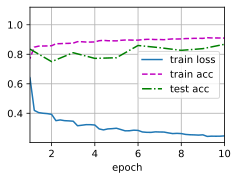

In [7]:
lr, num_epochs = 1.0, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)